In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number 6 Chapter 5 Problem 8

(100,)


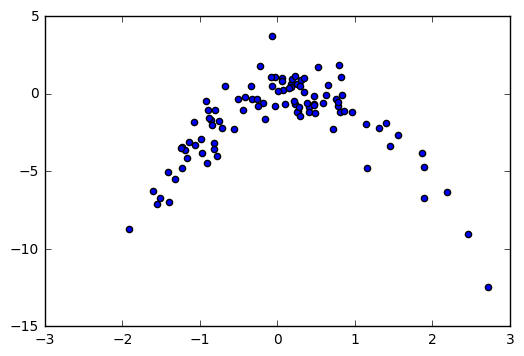

The plot shows a curve opening down


In [318]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
y = np.random.normal(size = 100)
#print(np.shape(y))
x = np.random.normal(size = 100)
#print(x)
y = x - 2*x**2 + np.random.normal(size = 100)
print(np.shape(y))
plt.scatter(x,y)
plt.show()
print("The plot shows a curve opening down")

In [319]:
def func1(x, b0, b1, c):
    return b0 + b1*x + c
def func2(x, b0, b1, b2, c):
    return b0 + b1*x + b2*x**2 + c
def func3(x, b0, b1, b2, b3, c):
    return b0 + b1*x + b2*x**2 + b3*x**3 + c
def func4(x, b0, b1, b2, b3, b4, c):
    return b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 +c

In [320]:
import scipy.optimize as optimization
z = np.zeros(100)
popt1, pcov1 = optimization.curve_fit(func1, x, y)
popt2, pcov2 = optimization.curve_fit(func2, x, y)
popt3, pcov3 = optimization.curve_fit(func3, x, y)
popt4, pcov4 = optimization.curve_fit(func4, x, y)
print(popt1, popt2, popt3, popt4)


[-121.29327509    0.1457862   119.57544994] [-163.3810265     0.95314025   -1.98717411  163.43541326] [  2.82230216e+02   7.81557378e-01  -2.07328823e+00   7.65102869e-02
  -2.82123948e+02] [ -6.08240748e+02   7.68532338e-01  -2.05092593e+00   8.62901452e-02
  -6.86611217e-03   6.08340136e+02]


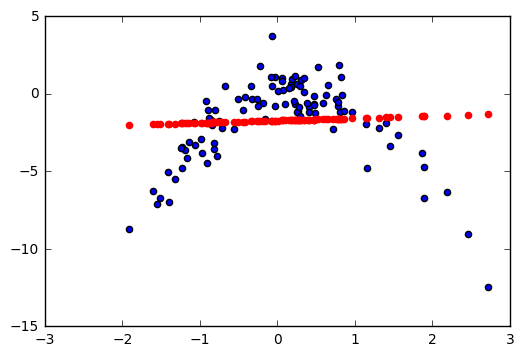

In [321]:
y1 = func1(x, popt1[0], popt1[1], popt1[2])
plt.scatter(x,y)
plt.scatter(x,y1,color='red')
plt.show()

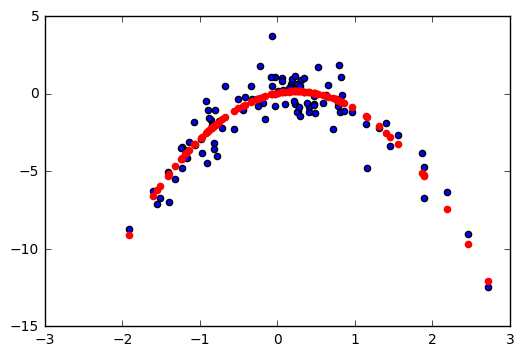

In [322]:
y2 = popt2[0] + popt2[1]*x + popt2[2]*x**2 + popt2[3]
plt.scatter(x,y)
plt.scatter(x,y2,color='red')
plt.show()

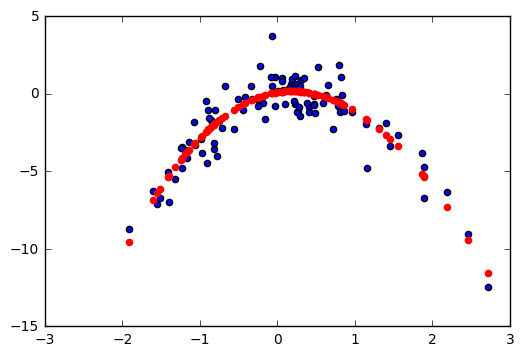

In [323]:
y3 = popt3[0] + popt3[1]*x + popt3[2]*x**2 + popt3[3]*x**3 + popt3[4]
plt.scatter(x,y)
plt.scatter(x,y3,color='red')
plt.show()

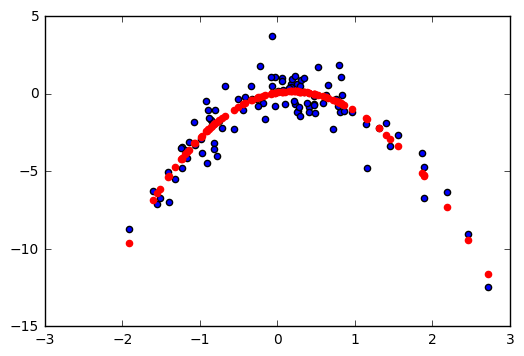

In [324]:
y4 = popt4[0] + popt4[1]*x + popt4[2]*x**2 + popt4[3]*x**3 + popt4[4]*x**4 + popt4[5]
plt.scatter(x,y)
plt.scatter(x,y4,color='red')
plt.show()

In [325]:
from sklearn import model_selection
loo = model_selection.LeaveOneOut()
np.random.seed(1)
diff1 = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    weights, throw_away = optimization.curve_fit(func1, x_train, y_train)
    diff1 += (y_test - func1(x_test, weights[0], weights[1], weights[2]))**2
    #print(y_test - func1(x_test, popt1[0], popt1[1], popt1[2]))
diff1 /= 100
print(diff1)
    #print(x_train, x_test

[ 7.66693969]


In [326]:
diff2 = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    weights, throw_away = optimization.curve_fit(func2, x_train, y_train)
    diff2 += (y_test - func2(x_test, weights[0], weights[1], weights[2], weights[3]))**2
    
diff2 /= 100
print(diff2)

[ 1.22258966]


In [327]:
diff3 = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    weights, throw_away = optimization.curve_fit(func3, x_train, y_train)
    diff3 += (y_test - func3(x_test, weights[0], weights[1], weights[2], weights[3], weights[4]))**2
    
diff3 /= 100
print(diff3)

[ 1.25370819]


In [328]:
diff4 = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    weights, throw_away = optimization.curve_fit(func4, x_train, y_train)
    diff4 += (y_test - func4(x_test, weights[0], weights[1], weights[2], weights[3], weights[4], weights[5]))**2
    
diff4 /= 100
print(diff4)

[ 1.3347502]


# Problem 6: Problem 9 from Chapter 6

In [342]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn import cross_validation

C:\Users\Connor Lewis\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [333]:
college = pd.read_csv("../Data/Data/College.csv")
college = college.replace(['Yes', 'No'], [1,0])
college.shape

(777, 19)

In [334]:
#Part A
features = ['Private', 'Accept', 'Enroll', 'Top10perc', 'F.Undergrad',
            'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal',
            'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
X_train, X_test, Y_train, Y_test = train_test_split(college[features], college['Apps'], test_size=0.4, random_state=42)

In [335]:
#Part B
lms = linear_model.LinearRegression()
lms.fit(X_train, Y_train)

score = mean_squared_error(Y_test, lms.predict(X_test))
print("Error:", score)

Error: 1715631.36559


In [336]:
#Part C
ridge_reg = linear_model.RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10])
ridge_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, ridge_reg.predict(X_test))
print("Error:", score)

Error: 1709449.43502


In [337]:
#Part D
lasso_reg = linear_model.LassoCV(alphas=[0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10])
lasso_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, lasso_reg.predict(X_test))
print("Error:", score)

Error: 1714562.20331


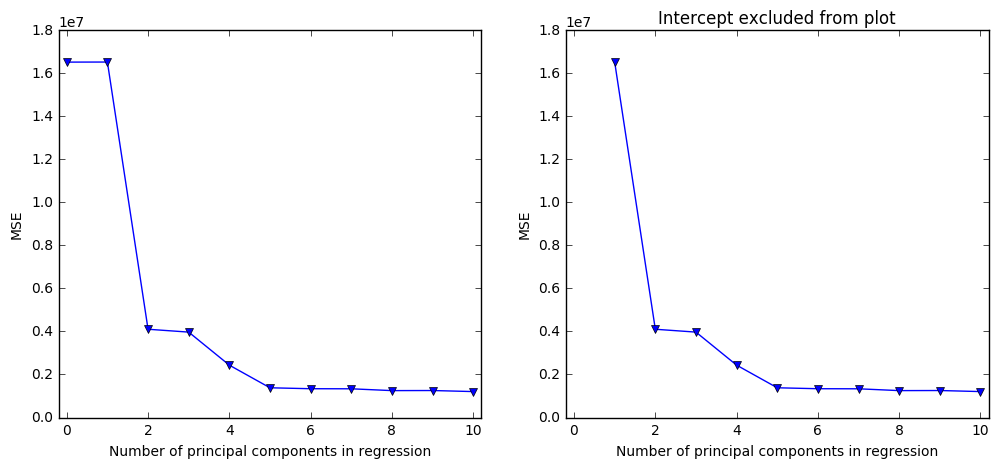

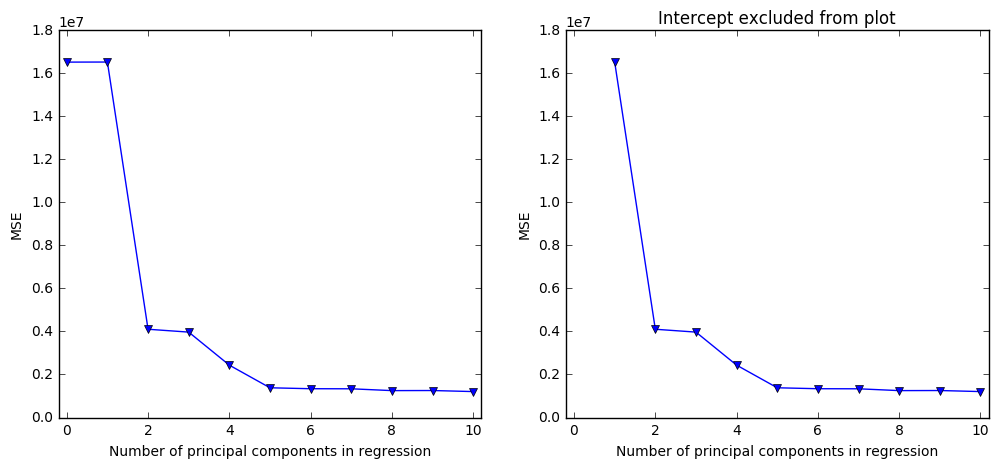

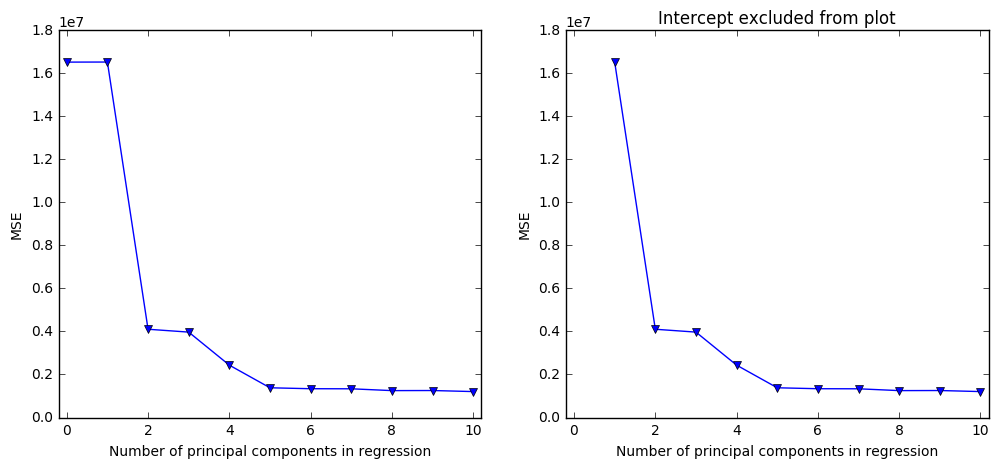

In [347]:
pca = PCA()
X_reduced = pca.fit_transform(X_train)

n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)

regr = linear_model.LinearRegression()
mse = []

score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1,11):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5,6,7,8,9,10], mse[1:11], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,10.2))
    
plt.show()

In [349]:
pcr_regr = linear_model.LinearRegression()
pcr_regr.fit(X_reduced[:,:5], Y_train)

score = mean_squared_error(Y_test, ridge_reg.predict(X_test))
print('Error: {}', score)
print('Value of M selected by CV: 5')

Error: {} 1709449.43502
Value of M selected by CV: 5


In [339]:
#Part F
from sklearn.cross_decomposition import PLSRegression
params = {'n_components':[2, 3, 4, 5, 7, 10]}

pls = PLSRegression()
pls_reg = GridSearchCV(pls, params, scoring='neg_mean_squared_error')
pls_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, pls_reg.predict(X_test))
print("Error:", score)
print("Value of M selected by CV: {}".format(pls_reg.best_params_['n_components']))

Error: 10923617.9387
Value of M selected by CV: 10


# Problem 8 Chapter 6 Problem 11

In [382]:
boston = pd.read_csv('../Data/Data/Boston.csv')
list(boston)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [390]:
features = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
X_train, X_test, Y_train, Y_test = train_test_split(boston[features], boston['crim'], test_size=0.4, random_state=42)

In [391]:
lms = linear_model.LinearRegression()
lms.fit(X_train, Y_train)
print(lms.coef_)

#score = mean_squared_error(Y_test, lms.predict(X_test))
score = lms.score(X_test, Y_test)

print("Error:", score)

[  4.04466640e-02  -2.34996572e-04  -1.08857870e+00  -1.22089571e+01
   3.20278358e-01   1.48012125e-02  -9.13000900e-01   5.60003121e-01
  -1.76685883e-03  -2.60682663e-01  -4.43421206e-03   1.51008506e-02
  -1.72899161e-01]
Error: 0.436176770244


In [392]:
ridge_reg = linear_model.RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10])
ridge_reg.fit(X_train, Y_train)

#score = mean_squared_error(Y_test, ridge_reg.predict(X_test))
print(ridge_reg.coef_)
score = ridge_reg.score(X_test, Y_test)
print("Error:", score)

[  4.06427165e-02  -1.97888015e-02  -1.10218337e+00  -7.63707597e+00
   2.97580731e-01   1.08858637e-02  -8.36550951e-01   5.49588575e-01
  -2.10540638e-03  -2.09130585e-01  -4.53832152e-03   1.17183881e-02
  -1.65693372e-01]
Error: 0.436961836044


In [393]:
lasso_reg = linear_model.LassoCV(alphas=[0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10])
lasso_reg.fit(X_train, Y_train)

#score = mean_squared_error(Y_test, lasso_reg.predict(X_test))
score = lasso_reg.score(X_test, Y_test)
print("Error:", score)

Error: 0.423384122685


## Ridge Regression Model fits the best for predicting crime rates in Boston we used all the features in our prediction